In [2]:
import pandas as pd
import lzma

df_reddit = pd.read_csv(
    lzma.open("../data/reddit_opinion_PSE_ISR.csv.lzma"), low_memory=False)

df_acled = pd.read_csv("../data/acled_middle_east_data.csv")

/var/folders/8s/5kb_fl851lbfqsvhg3z5m8ww0000gn/T/ipykernel_98344/1915750956.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df_reddit.columns

Index(['comment_id', 'score', 'self_text', 'subreddit', 'created_time',
       'post_id', 'author_name', 'controversiality', 'ups', 'downs',
       'user_is_verified', 'user_account_created_time', 'user_awardee_karma',
       'user_awarder_karma', 'user_link_karma', 'user_comment_karma',
       'user_total_karma', 'post_score', 'post_self_text', 'post_title',
       'post_upvote_ratio', 'post_thumbs_ups', 'post_total_awards_received',
       'post_created_time'],
      dtype='object')

- do sentiment analysis --> percent positive / negative in last 7 days
- things to evaluate over 7 days


In [74]:
import pandas as pd
from datetime import timedelta

seven_days_avg_df = pd.DataFrame()

times = [df_reddit['created_time'].min() + timedelta(days=7*i)
         for i in range(1, 16)]

df_reddit.dropna(subset=['created_time', 'controversiality', "user_is_verified",
                 "user_total_karma", "post_total_awards_received"], inplace=True)

df_reddit['user_account_created_time'] = pd.to_datetime(
    df_reddit['user_account_created_time']).dt.normalize()

for time in times:
    events_count = df_acled.loc[df_acled["event_date"]
                                < time]["event_date"].count()
    filtered_reddit = df_reddit.loc[df_reddit["created_time"] < time]

    total_posts = filtered_reddit.shape[0]
    if total_posts > 0:
        percentage_controversial_posts = filtered_reddit['controversiality'].sum(
        ) / total_posts * 100
        percentage_verified_users = filtered_reddit['user_is_verified'].sum(
        ) / total_posts * 100
        avg_user_total_karma = filtered_reddit["user_total_karma"].mean()
        sum_post_awards_received = filtered_reddit["post_total_awards_received"].sum(
        )

        percentage_acc_created_last_month = (filtered_reddit.loc[filtered_reddit['user_account_created_time'] > (
            time-timedelta(days=93))].shape[0] / total_posts) * 100

    else:
        percentage_controversial_posts = 0
        percentage_verified_users = 0
        avg_user_total_karma = 0
        avg_post_awards_received = 0

    temp_df = pd.DataFrame([{
        'events_count': events_count,
        'percentage_controversial_posts': percentage_controversial_posts,
        'percentage_verified_users': percentage_verified_users,
        'sum_post_awards_received': sum_post_awards_received,
        'avg_user_total_karma': avg_user_total_karma,
        'percentage_acc_created_last_month': percentage_acc_created_last_month
    }])

    seven_days_avg_df = pd.concat(
        [seven_days_avg_df, temp_df], ignore_index=True)

In [75]:
seven_days_avg_df

,events_count,percentage_controversial_posts,percentage_verified_users,sum_post_awards_received,avg_user_total_karma,percentage_acc_created_last_month
0,3390,6.459330,84.928230,0,46996.076555,3.588517
1,3491,5.341880,88.247863,0,49735.231838,7.371795
2,3599,4.737733,89.932318,0,56747.818105,6.260575
3,3702,3.656679,91.213814,0,51726.637379,5.738954
4,3818,5.283019,90.867925,0,49153.656604,4.943396
5,4276,5.306200,93.077216,0,36380.849563,7.036896
6,4602,6.994768,94.661887,0,39153.330072,6.258477
7,4900,7.311944,95.728190,0,49652.813086,4.728431
8,5238,7.434894,96.402645,0,56233.743327,3.991364
9,5541,6.004255,96.681131,0,44411.471650,6.030700


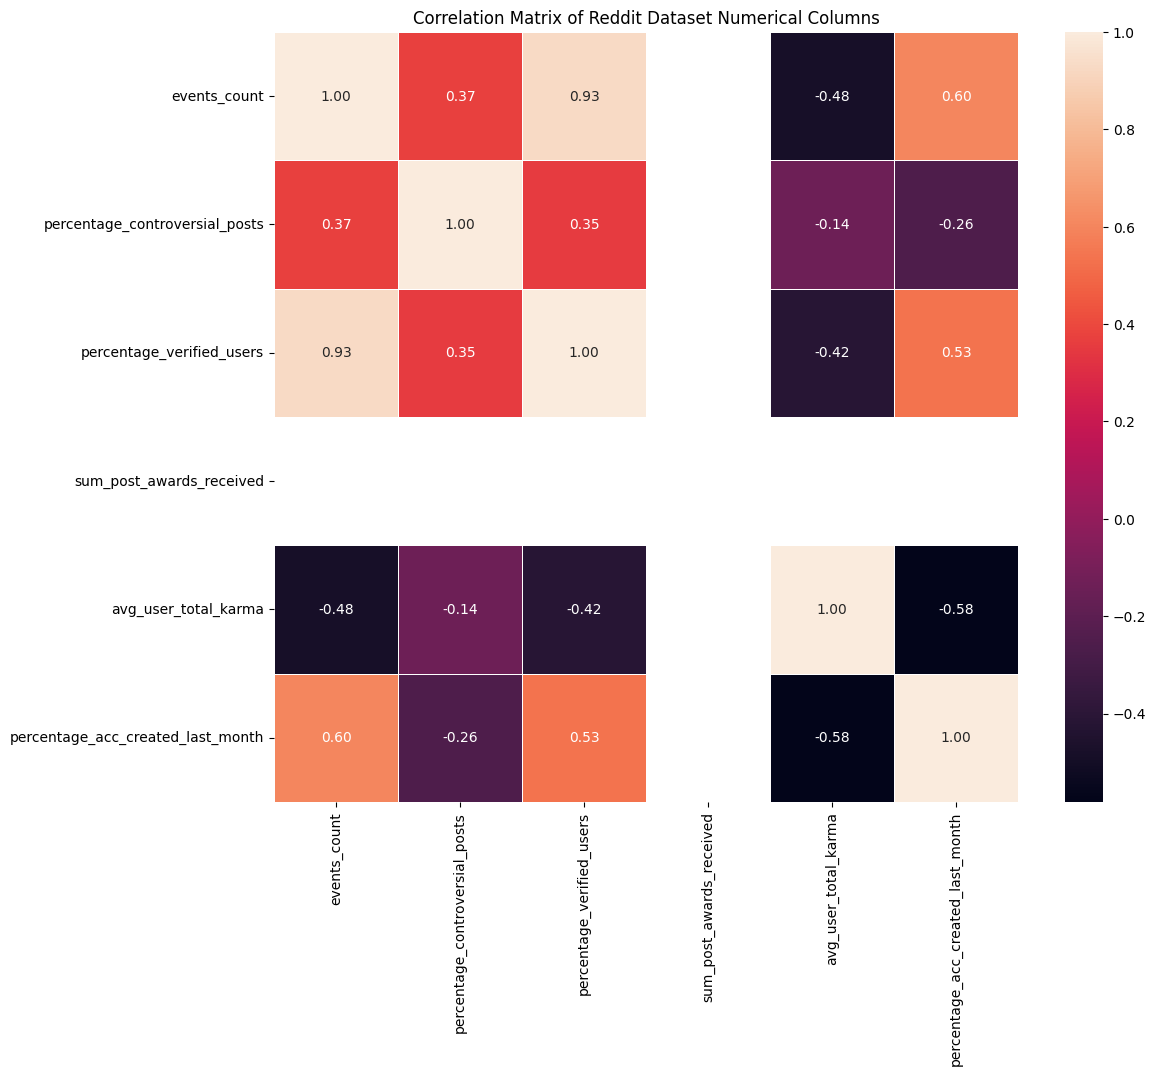

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt


# Compute the correlation matrix
correlation_matrix = seven_days_avg_df.corr()


# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Reddit Dataset Numerical Columns')
plt.show()

In [52]:
df_reddit.columns

Index(['comment_id', 'score', 'self_text', 'subreddit', 'created_time',
       'post_id', 'author_name', 'controversiality', 'ups', 'downs',
       'user_is_verified', 'user_account_created_time', 'user_awardee_karma',
       'user_awarder_karma', 'user_link_karma', 'user_comment_karma',
       'user_total_karma', 'post_score', 'post_self_text', 'post_title',
       'post_upvote_ratio', 'post_thumbs_ups', 'post_total_awards_received',
       'post_created_time', 'events_prev_7_days'],
      dtype='object')

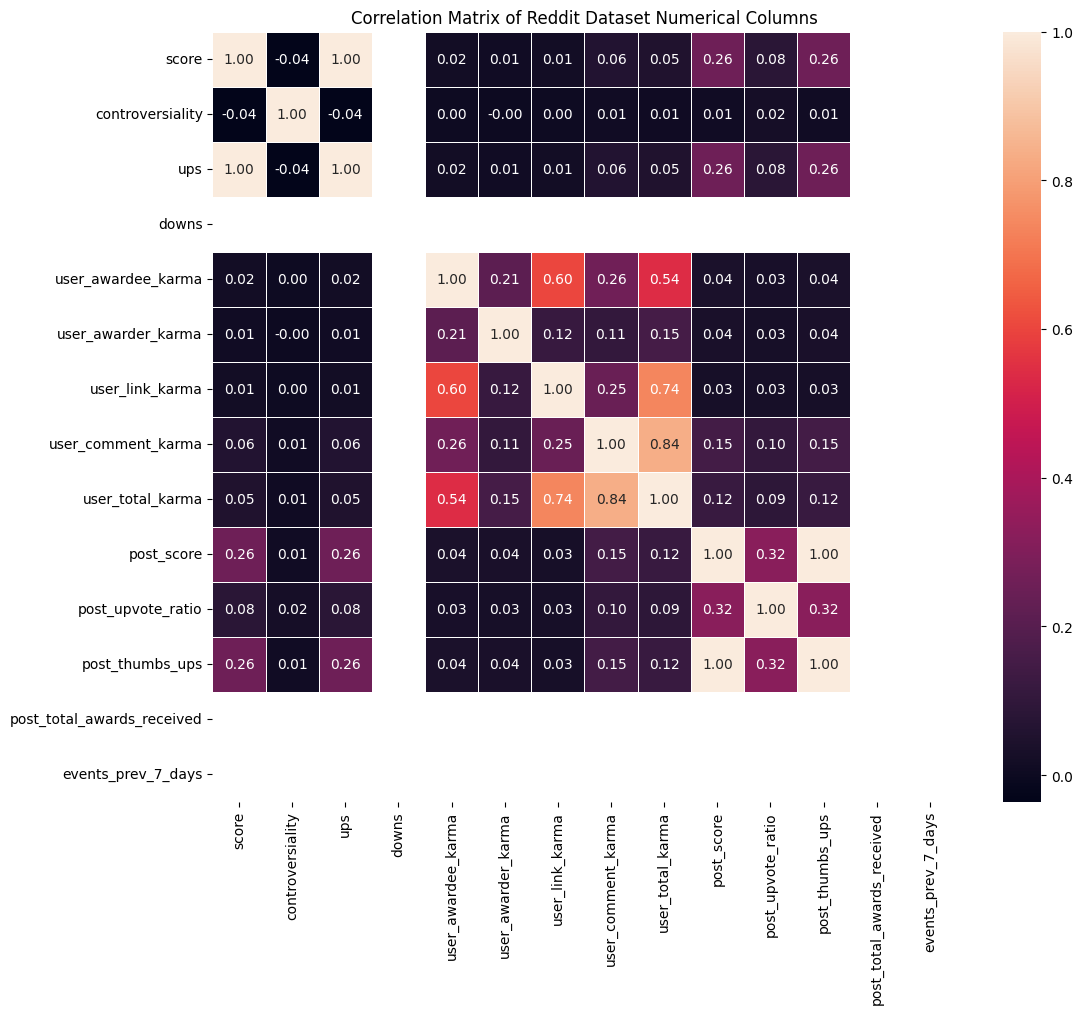

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns_reddit = df_reddit.select_dtypes(
    include=['int64', 'float64'])

correlation_matrix = numerical_columns_reddit.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Reddit Dataset Numerical Columns')
plt.show()